In [1]:
source('/Users/dongmeichen/GitHub/SDM/R/model_output_functions.R')

In [2]:
train <- merge.files('train')

Merging train data...


In [6]:
path <- '/Users/dongmeichen/Documents/beetle/data/'
out <- '/Users/dongmeichen/Documents/beetle/output/'

In [7]:
i <- 5
model <- paste0('model', i)

In [8]:
coeff <- read.csv(paste0(path, model,'/coefficients.csv'), stringsAsFactors = FALSE)

In [9]:
if(i==1){
    ndf <- train[,-which(colnames(train) %in% c("x", "y", "x.new", "y.new", "xy"))]
}else{
    squares <- grep('_sq', coeff$predictor, value=TRUE)
    cubes <- grep('_cub', coeff$predictor, value=TRUE)
    interactions <- grep(':', coeff$predictor, value=TRUE)
    singles <- coeff$predictor[!(coeff$predictor %in% c(squares, cubes, interactions))]
    ndf <- get.data.frame(train)
}

Calculated JanTmin_sq ...
Calculated etopo1_sq ...
Calculated lat_sq ...
Calculated Mar20_sq ...
Calculated vpd_sq ...
Calculated ddAugJul_sq ...
Calculated cwd_sq ...
Calculated AugMaxT_sq ...
Calculated ddAugJun_sq ...
Calculated PPT_sq ...
Calculated summerP2_sq ...
Calculated POctSep_sq ...
Calculated Pmean_sq ...
Calculated PMarAug_sq ...
Calculated max.drop_sq ...
Calculated age_sq ...
Calculated Acs_sq ...
Calculated maxT_sq ...
Calculated mi_sq ...
Calculated OctTmin_sq ...
Calculated OctMin_sq ...
Calculated summerP0_sq ...
Calculated summerP1_sq ...
Calculated sum9_diff_sq ...
Calculated PcumOctSep_sq ...
Calculated Tmin_sq ...
Calculated MarMin_sq ...
Calculated wd_sq ...
Calculated AugTmean_cub ...
Calculated lat_cub ...
Calculated TMarAug_cub ...
Calculated JanMin_cub ...
Calculated minT_cub ...
Calculated Jan20_cub ...
Calculated fallTmean_cub ...
Calculated lon_cub ...
Calculated Tvar_cub ...
Calculated MarTmin_cub ...
Calculated AugTmax_cub ...
Calculated winterMin_cub 

In [10]:
if(i==1){
    drops <- c('summerP2')
}else if(i==2){
    drops <- c('summerP1', 'lat:summerP1', 'lon:summerP1', 'etopo1:summerP2')
}else if(i==3){
    drops <- c('sum9_t1', 'summerP2', 'lon:summerP1', 'lat:summerP0', 'etopo1:summerP2')
}else{
    drops <- c('sum9_t1', 'summerP2', 'lon:summerP1', 'lat:summerP0', 'etopo1:summerP1', 'density:summerP1')
}

In [11]:
strings <- capture.output(var.string(coeff, drops))
mod.string <- paste0('glm(btl_t ~ ', strings, ', data=ndf, family=binomial())')

In [12]:
ptm <- proc.time()
mod <- eval(parse(text=mod.string))
proc.time() - ptm

   user  system elapsed 
814.359  28.833 862.598 

In [21]:
summary(mod)


Call:
glm(formula = btl_t ~ density:Tmean + lat:TMarAug + AugTmean_cub + 
    sum9_diff + lat_cub + TMarAug_cub + lon:lat:etopo1 + density:TMarAug + 
    etopo1:vpd + JanTmin_sq + lon:sum9_diff + lon:Jan20 + sum9_t2 + 
    density:TOctSep + density:vpd + lat:maxAugT + JanMin_cub + 
    Acs + etopo1 + etopo1:AugTmean + etopo1_sq + minT_cub + lat:AugTmean + 
    lon:JanTmin + etopo1:cwd + lat:summerTmean + lat_sq + maxAugT + 
    OctMin + Tvar + lat:OctTmin + Jan20_cub + lat:mi + Tmean + 
    lon:Mar20 + lon:OctMin + PMarAug + etopo1:TOctSep + Tmin + 
    etopo1:mi + lon:summerP0 + lon:Acs + lon:Tmean + fallTmean_cub + 
    MarMin + lon:Tmin + lat:fallTmean + lat:maxT + lat:JanTmin + 
    lat:POctSep + lat:TOctSep + lon:summerP2 + lon_cub + etopo1:OctTmin + 
    lat:sum9_diff + etopo1:ddAugJul + lon:AugTmean + Jan20 + 
    ddAugJun + summerTmean + lat:MarTmin + vgt + lon:OctTmin + 
    Mar20_sq + vpd_sq + lon:maxAugT + etopo1:MarTmin + etopo1:maxAugT + 
    lon + etopo1:summerTmean + fa

In [13]:
vars <- c('TMarAug','Tmean','Tvar','ddAugJul','AugTmean','maxAugT','summerTmean','OptTsum',
          'JanTmin', 'Jan20', 'Acs', 'minT','summerP0', 'vpd', 'cwd', 'wd')
varnms <- c('Growing season (Mar - Aug) temperature', 'Annual mean temperature', 'Seasonal temperature variation',
            'Degree days from Aug to Jul', 'Mean August temperature', 'Frequency of ≥ 18.3 °C temperature in Aug',
            'Mean summer temperature', 'Days with optimum summer temperatures', 
            'January minimum temperature', 'Days with a ≤-20 °C temperature in Jan','Average duration of cold snaps', 
            'Minimum daily temperature (Aug-Jul)', 'Summer precipitation', 'Vapor pressure deficit', 
            'Cumulative climatic water deficit', 'Water deficit')

In [14]:
head(ndf)

btl_t,sum9_diff,sum9_t2,Acs,etopo1,maxAugT,OctMin,Tvar,Tmean,PMarAug,⋯,MarTmin_cub,AugTmax_cub,winterMin_cub,OptTsum_cub,age_cub,sum9_diff_cub,Tmean_cub,summerTmean_cub,density_cub,TOctSep_cub
0,0,0,0,994,31,-0.9903192,8.595260,17.92430,94.05243,⋯,24.98798,38344.81,-747.3379,373248,0,0,5758.730,21926.32,1.855666e+09,5765.615
0,0,0,0,948,31,-0.8581916,8.630087,18.14168,87.02101,⋯,32.42007,38991.29,-732.3474,274625,0,0,5970.802,22524.15,2.007043e+01,5978.004
0,0,0,0,944,31,-0.5260306,8.661894,18.15920,81.11690,⋯,31.35720,38950.24,-717.2137,250047,0,0,5988.114,22569.80,6.708259e+09,5995.476
0,0,0,0,889,31,-0.4928438,8.771569,18.45130,76.24133,⋯,41.75022,40127.72,-672.3877,195112,0,0,6281.752,23587.49,1.240710e+08,6289.760
0,0,0,0,827,31,-0.4436704,8.838607,18.67021,68.74231,⋯,52.71887,40989.16,-616.7952,132651,0,0,6508.001,24357.48,2.819073e+10,6519.838
0,0,0,0,801,31,-0.5019645,8.923908,18.86408,65.20767,⋯,63.03671,41862.36,-566.0512,125000,0,0,6712.847,25143.72,1.820109e+11,6728.704


In [15]:
names(ndf)

[1] "btl_t"           "sum9_diff"       "sum9_t2"         "Acs"            
 [5] "etopo1"          "maxAugT"         "OctMin"          "Tvar"           
 [9] "Tmean"           "PMarAug"         "Tmin"            "MarMin"         
[13] "Jan20"           "ddAugJun"        "summerTmean"     "vgt"            
[17] "lon"             "fallTmean"       "winterMin"       "ddAugJul"       
[21] "JanMin"          "maxT"            "wd"              "density"        
[25] "summerP0"        "max.drop"        "vpd"             "sum9_t1"        
[29] "AugTmean"        "lat"             "cwd"             "btl_t1"         
[33] "age"             "TOctSep"         "btl_t2"          "PPT"            
[37] "AugTmax"         "mi"              "OctTmin"         "summerP1"       
[41] "OptTsum"         "JanTmin"         "AugMaxT"         "Mar20"          
[45] "TMarAug"         "summerP2"        "POctSep"         "Pmean"          
[49] "PcumOctSep"      "MarTmin"         "minT"            "JanTmin_sq"     
[53] "etopo1_sq"       "lat_sq"          "Mar20_sq"        "vpd_sq"         
[57] "ddAugJul_sq"     "cwd_sq"          "AugMaxT_sq"      "ddAugJun_sq"    
[61] "PPT_sq"          "summerP2_sq"     "POctSep_sq"      "Pmean_sq"       
[65] "PMarAug_sq"      "max.drop_sq"     "age_sq"          "Acs_sq"         
[69] "maxT_sq"         "mi_sq"           "OctTmin_sq"      "OctMin_sq"      
[73] "summerP0_sq"     "summerP1_sq"     "sum9_diff_sq"    "PcumOctSep_sq"  
[77] "Tmin_sq"         "MarMin_sq"       "wd_sq"           "AugTmean_cub"   
[81] "lat_cub"         "TMarAug_cub"     "JanMin_cub"      "minT_cub"       
[85] "Jan20_cub"       "fallTmean_cub"   "lon_cub"         "Tvar_cub"       
[89] "MarTmin_cub"     "AugTmax_cub"     "winterMin_cub"   "OptTsum_cub"    
[93] "age_cub"         "sum9_diff_cub"   "Tmean_cub"       "summerTmean_cub"
[97] "density_cub"     "TOctSep_cub"

In [39]:
med.df <- data.frame(t(apply(ndf, 2, median, na.rm=TRUE)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

In [40]:
test.df <- med.df

In [41]:
xmin <- quantile(ndf[, field], probs=0.025)
xmax <- quantile(ndf[, field], probs=0.975)

In [42]:
test.df[, field] <- seq(xmin, xmax, length=100)

In [43]:
head(test.df)

,btl_t,sum9_diff,sum9_t2,Acs,etopo1,maxAugT,OctMin,Tvar,Tmean,PMarAug,⋯,MarTmin_cub,AugTmax_cub,winterMin_cub,OptTsum_cub,age_cub,sum9_diff_cub,Tmean_cub,summerTmean_cub,density_cub,TOctSep_cub
1,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534
1.1,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534
1.2,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534
1.3,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534
1.4,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534
1.5,0,0,0,0,1119,30,-7,8.825953,6.07141,245.2352,⋯,-179.8418,18161.37,-15741.77,46656,0,0,223.8044,4884.057,4.421033e+12,223.5534


In [44]:
preds <- predict(mod, test.df, type="response")

In [45]:
preds

1          1.1          1.2          1.3          1.4          1.5 
0.0008205777 0.0009091346 0.0010072388 0.0011159177 0.0012363082 0.0013696692 
         1.6          1.7          1.8          1.9         1.10         1.11 
0.0015173941 0.0016810249 0.0018622682 0.0020630123 0.0022853462 0.0025315805 
        1.12         1.13         1.14         1.15         1.16         1.17 
0.0028042707 0.0031062424 0.0034406190 0.0038108526 0.0042207571 0.0046745449 
        1.18         1.19         1.20         1.21         1.22         1.23 
0.0051768674 0.0057328582 0.0063481807 0.0070290805 0.0077824410 0.0086158444 
        1.24         1.25         1.26         1.27         1.28         1.29 
0.0095376370 0.0105570003 0.0116840258 0.0129297961 0.0143064697 0.0158273715 
        1.30         1.31         1.32         1.33         1.34         1.35 
0.0175070866 0.0193615583 0.0214081881 0.0236659377 0.0261554299 0.0288990479 
        1.36         1.37         1.38         1.39         1.40         1.41 
0.0319210290 0.0352475493 0.0389067973 0.0429290286 0.0473465981 0.0521939624 
        1.42         1.43         1.44         1.45         1.46         1.47 
0.0575076439 0.0633261485 0.0696898274 0.0766406714 0.0842220276 0.0924782267 
        1.48         1.49         1.50         1.51         1.52         1.53 
0.1014541094 0.1111944426 0.1217432171 0.1331428203 0.1454330850 0.1586502167 
        1.54         1.55         1.56         1.57         1.58         1.59 
0.1728256114 0.1879845846 0.2041450393 0.2213161122 0.2394968482 0.2586749616 
        1.60         1.61         1.62         1.63         1.64         1.65 
0.2788257488 0.2999112245 0.3218795509 0.3446648260 0.3681872859 0.3923539592 
        1.66         1.67         1.68         1.69         1.70         1.71 
0.4170597901 0.4421892199 0.4676181899 0.4932164988 0.5188504241 0.5443854984 
        1.72         1.73         1.74         1.75         1.76         1.77 
0.5696893182 0.5946342618 0.6190999994 0.6429756931 0.6661618082 0.6885714813 
        1.78         1.79         1.80         1.81         1.82         1.83 
0.7101314229 0.7307823552 0.7504790132 0.7691897565 0.7868958522 0.8035904963 
        1.84         1.85         1.86         1.87         1.88         1.89 
0.8192776472 0.8339707378 0.8476913298 0.8604677651 0.8723338582 0.8833276634 
        1.90         1.91         1.92         1.93         1.94         1.95 
0.8934903429 0.9028651501 0.9114965367 0.9194293844 0.9267083595 0.9333773820 
        1.96         1.97         1.98         1.99 
0.9394792012 0.9450550661 0.9501444800 0.9547850286

In [51]:
field

[1] "wd"

In [61]:
coef(summary(mod))[grepl(field,row.names(coef(summary(mod)))), 4]

wd       cwd_sq          cwd        wd_sq   etopo1:cwd    etopo1:wd 
8.289521e-01 3.372170e-03 4.388111e-13 3.343328e-03 3.102304e-02 1.627547e-11 
     lat:cwd  density:cwd       lon:wd   density:wd       lat:wd      lon:cwd 
1.423270e-01 9.728563e-01 1.406357e-02 9.416208e-02 3.915248e-06 6.920576e-33

In [63]:
coef(summary(mod))[row.names(coef(summary(mod))) %in% field , 4]

[1] 0.8289521

In [64]:
p <- coef(summary(mod))[row.names(coef(summary(mod))) %in% field , 4]
paste("p =",formatC(p, format = "e", digits = 2))

[1] "p = 8.29e-01"

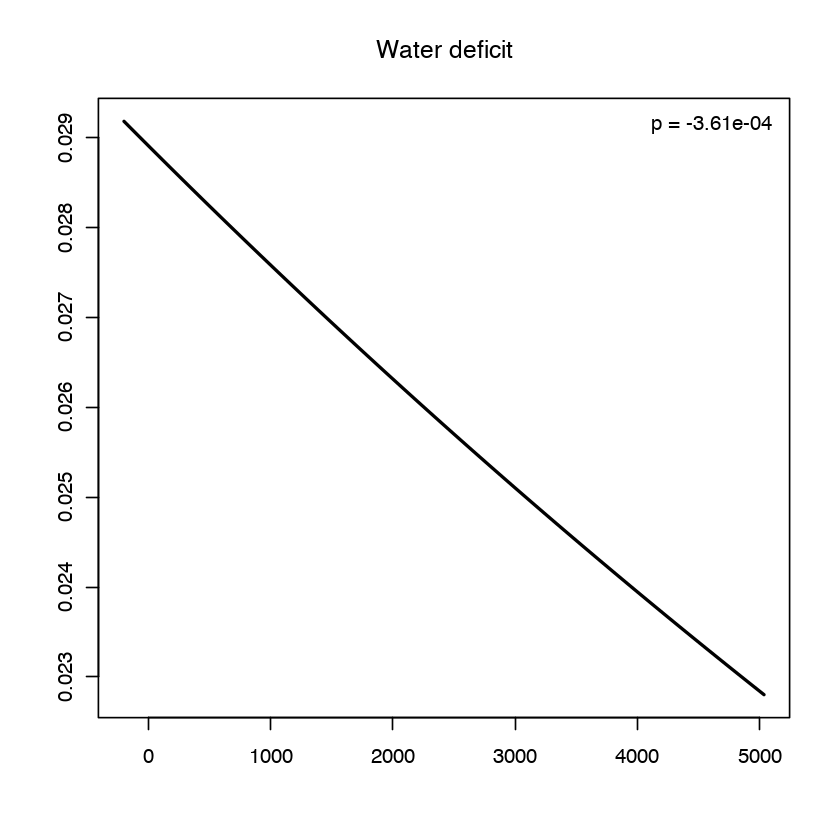

In [57]:
plot(preds ~ test.df[, field], 
         type='l', lty=1, lwd=2,
         main=varnms[which(vars==field)],
         xlab='', 
         ylab='')
legend("topright", paste("p =",formatC(coef(mod)[field], format = "e", digits = 2)), bty="n") 

In [65]:
png(paste0(out,'biovariate_plot_',i,'.png'), width=14, height=12, units="in", res=300)
par(mfrow=c(4,4),mar=c(3.5,3.5,3,1))
for (field in vars) {
    j <- which(vars==field)
    test.df <- med.df
    xmin <- quantile(ndf[, field], probs=0.025)
    xmax <- quantile(ndf[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod, newdata=test.df, type="response")
    p <- coef(summary(mod))[row.names(coef(summary(mod))) %in% field , 4]
    if(p <= 0.05){
        lty=1
    }else{
        lty=2
    }
    plot(preds ~ test.df[, field], 
         type='l', lty=lty, lwd=2,
         main=varnms[j],
         xlab='', 
         ylab='')
    if(j %in% c(3:6, 9, 11:13, 15:16)){
        legend("topright", paste("p =",formatC(p, format = "e", digits = 2)), bty="n", cex=1.5)
    }else{
        legend("topleft", paste("p =",formatC(p, format = "e", digits = 2)), bty="n", cex=1.5)
    }
}
dev.off()

pdf 
  2